## Assignment 5
* Jesse Aguirre
* jaa369,11273119
* Professor Wahid
* CME 466
  

| Method            |                            |  PSNR in dB                          |                          |
|-------------------|----------------------------------------------|--------------------|--------------------------|
|                   | Noisy image (noisy image vs original)        | Denoised only (denoised image vs original)    | Denoised and sharpened (sharpened image vs original) |
| Denoising method 1| 28.757587807441865                           | 27.97742904344192  | 22.885244372876777       |
| Denoising method 2| 28.757587807441865                           | 27.03866013694026  | 27.92940104984269        |
| Denoising method 3| 28.757587807441865                           | 27.81507890975421  | 25.777499253477032       |



## Load Image

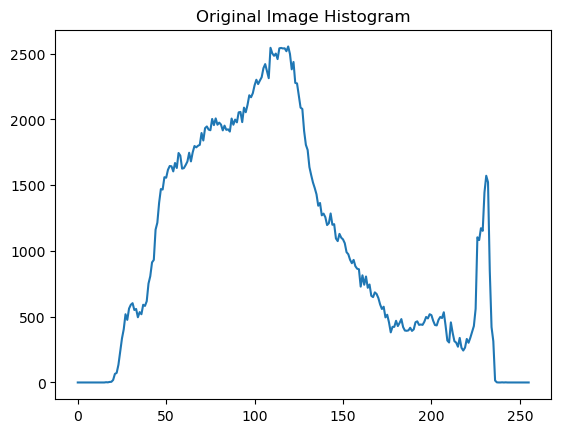

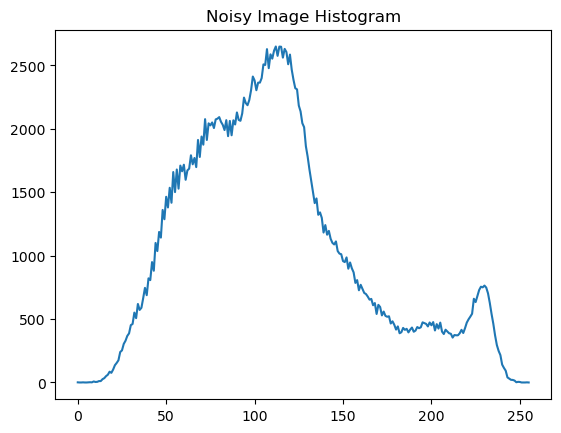

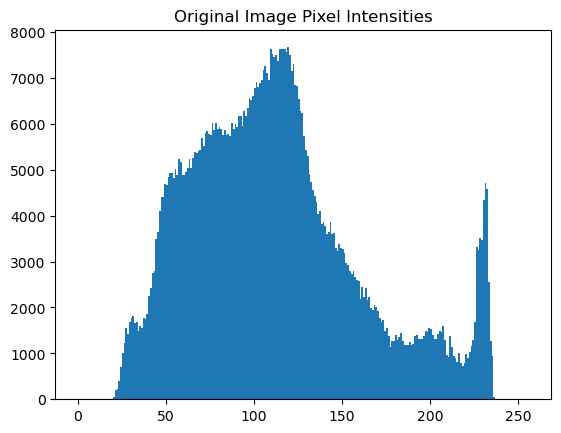

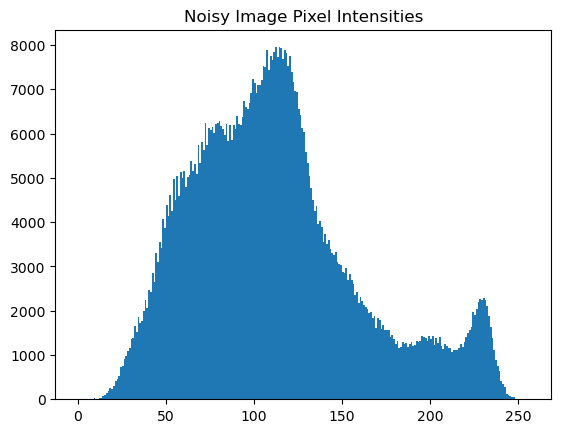

PSNR between original and noisy image: 28.757587807441865


In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys
import os


# Load the image
img_path = os.path.join('..', 'data', 'Goldhill_2-1.jpg')
if img_path is None:
    sys.exit("Could not read the image.")
noise_img_path = os.path.join('..', 'data', 'Goldhill_2noisy.jpg')
if noise_img_path is None:
    sys.exit("Could not read the image.")

# Display both images
og_img = cv.imread(img_path, cv.IMREAD_COLOR)
cv.imshow('Original Image', og_img)
cv.waitKey(0)
noise_img = cv.imread(noise_img_path, cv.IMREAD_COLOR)
cv.imshow('Noisy Image', noise_img)
cv.waitKey(0)
cv.destroyAllWindows()

# Calculate the histogram of the original image
og_hist = cv.calcHist([og_img], [0], None, [256], [0, 256])
plt.plot(og_hist)
plt.title('Original Image Histogram')
plt.show()

# Calculate the histogram of the noisy image
noise_hist = cv.calcHist([noise_img], [0], None, [256], [0, 256])
plt.plot(noise_hist)
plt.title('Noisy Image Histogram')
plt.show()


# See the pixel intensities of the original image
plt.hist(og_img.ravel(), 256, [0, 256])
plt.title('Original Image Pixel Intensities')
plt.show()

# See the pixel intensities of the noisy image
plt.hist(noise_img.ravel(), 256, [0, 256])
plt.title('Noisy Image Pixel Intensities')
plt.show()

# Calculate the PSNR between the original and noisy image
psnr1_a = cv.PSNR(og_img, noise_img)
print(f'PSNR between original and noisy image: {psnr1_a}')






# De-noising Methods Go here
1. We shall apply medianBlur for the first de-noising method
2. We shall apply a gaussian filter for the second de-noising method
3. We shall apply a flat/box blur for the third de-noising method

In [11]:
# Median Blur the noisy image
median_img = cv.medianBlur(noise_img, 5)
# apply a gaussian blur to the noisy image
gaussian_img = cv.GaussianBlur(noise_img, (11, 11), 0)
# Use cv.fastNlMeansDenoising to denoise grayscale image
# Box/Blur did not work well
dst_img = cv.fastNlMeansDenoisingColored(noise_img, None, 10, 10, 7, 21)

# Display the median blurred image
cv.imshow('Median Blurred Image', median_img)
cv.waitKey(0)
cv.destroyAllWindows()

# Display the gaussian blurred image
cv.imshow('Gaussian Blurred Image', gaussian_img)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('Fast Non-Local Means Denoising', dst_img)
cv.waitKey(0)
cv.destroyAllWindows()





# Calculating PSNRs

In [12]:
# Calculate PSNR between the original and median blurred image
psnr2_a = cv.PSNR(og_img, median_img)
print(f'PSNR between original and median blurred image: {psnr2_a}')

# Calculate PSNR between the original and gaussian blurred image
psnr3_a = cv.PSNR(og_img, gaussian_img)
print(f'PSNR between original and gaussian blurred image: {psnr3_a}')

# Calculate PSNR between the original and Fast Non Local Means Denoising
psnr4_a = cv.PSNR(og_img, dst_img)
print(f'PSNR between original and Fast Non Local Means Denoising: {psnr4_a}')


PSNR between original and median blurred image: 27.97742904344192
PSNR between original and gaussian blurred image: 27.03866013694026
PSNR between original and box blurred image: 27.81507890975421


# Sharpening All Images

In [15]:
# Prepare sharpening kernels
# Sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])

# Sharpen the median blurred image
sharpened_median_img = cv.filter2D(median_img, -1, sharpening_kernel)
# Sharpen the gaussian blurred image
sharpened_gaussian_img = cv.filter2D(gaussian_img, -1, sharpening_kernel)
# Sharpen the Fast Non Local Means Denoising image
sharpened_dst_img = cv.filter2D(dst_img, -1, sharpening_kernel)

# Display the sharpened median blurred image
cv.imshow('Sharpened Median Blurred Image', sharpened_median_img)
cv.waitKey(0)
cv.destroyAllWindows()

# Display the sharpened gaussian blurred image
cv.imshow('Sharpened Gaussian Blurred Image', sharpened_gaussian_img)
cv.waitKey(0)
cv.destroyAllWindows()

# Display the sharpened Fast Non Local Means Denoising image
cv.imshow('Sharpened Fast Non Local Means Denoising', sharpened_dst_img)
cv.waitKey(0)
cv.destroyAllWindows()

# Calculate PSNR between the original and sharpened median blurred image
psnr5_a = cv.PSNR(og_img, sharpened_median_img)
print(f'PSNR between original and sharpened median blurred image: {psnr5_a}')

# Calculate PSNR between the original and sharpened gaussian blurred image
psnr6_a = cv.PSNR(og_img, sharpened_gaussian_img)
print(f'PSNR between original and sharpened gaussian blurred image: {psnr6_a}')

# Calculate PSNR between the original and sharpened Fast Non Local Means Denoising
psnr7_a = cv.PSNR(og_img, sharpened_dst_img)
print(f'PSNR between original and sharpened Fast Non Local Means Denoising: {psnr7_a}')








PSNR between original and sharpened median blurred image: 22.885244372876777
PSNR between original and sharpened gaussian blurred image: 27.92940104984269
PSNR between original and sharpened Fast Non Local Means Denoising: 25.777499253477032
